</center><img src="https://www3.um.edu.uy/logoum.jpg" width=300></center>
<h1 align="center">Introducción a la Ciencia de Datos</h1>
<h2 align="center"> <font color='gray'>Trabajo Final</font></h2>

In [3]:
import datetime
import itertools
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('data.csv')
data.head(10)

clean_data = data

Serrana:
age: edad
housing: ¿tiene préstamo para vivienda? -> binaria, faltantes (?) - evaluar correlacion con otras columnas (trabajo, edad) 
duration: duración último contacto, en segundos -> dividir en categorias (data binning: equal width o frequency)

## Age

#### Outliers

In [13]:
max = data['age'].max()
min = data['age'].min()
print(f'The max ({max}) and min ({min}) ages are within normal ranges')

The max (98) and min (17) ages are within normal ranges


#### Age distribution

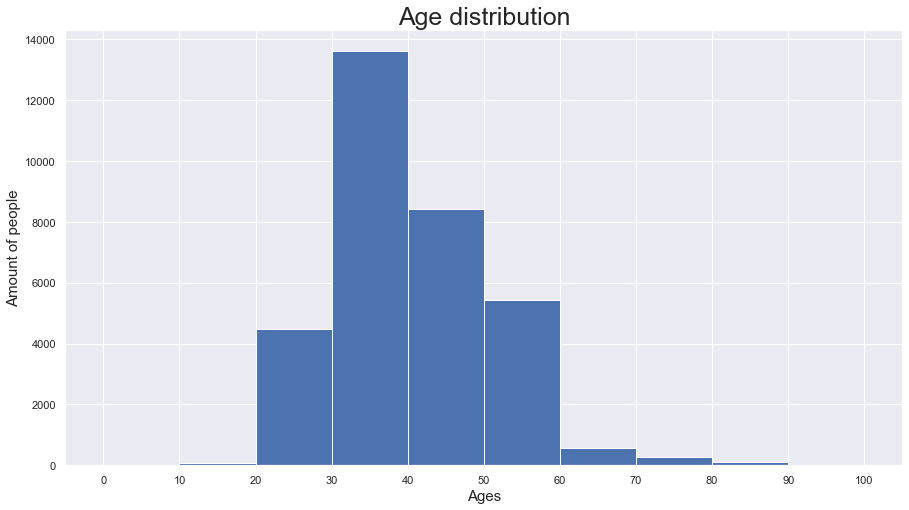

In [14]:
ages = data['age']
range = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.figure(figsize=(15,8))
sns.set()
plt.hist(ages, bins=range)
plt.title(label="Age distribution", fontsize=25)
plt.xticks(range)
plt.xlabel('Ages', fontsize=15)
plt.ylabel('Amount of people', fontsize=15)
plt.show()

## Job

Categorica nominal 
(cuantas categorias hay?, una col por categoria + top k)

In [15]:
count = data['job'].value_counts()
print(count)
categories = data['job'].unique()
print("amount: ", len(categories))

admin.           8371
blue-collar      7383
technician       5418
services         3173
management       2328
retired          1358
entrepreneur     1156
self-employed    1148
housemaid         858
unemployed        813
student           698
unknown           246
Name: job, dtype: int64
amount:  12


Hay 246 datos faltantes. Creo que en este caso no tiene sentido imputarlos por valores parecidos (Hot deck), porque no hay datos de cuanto ganan ni nada que sea especifico de los trabajos.
Podemos imputarlo aleatoriamente.

Otra cosa: como podemos capaz juntarlos en categorías para disminuir en cols. Ej:
- entrepreneur + self-employed 
- admin. + management
- blue-collar
- technician + services
- retired + unemployed + student   
- housemaid 

#### Missing data imputation

#### One hot encoding

In [16]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['job'], prefix='job', drop_first = False)], axis=1)
clean_data.drop(columns='job')
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,...,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,...,0,0,0,0,0,0,0,0,0,0
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,...,0,0,0,1,0,0,0,0,0,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,...,0,0,0,0,0,0,0,0,0,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,...,0,0,0,0,0,0,0,0,0,0


## Housing

This data is a categorical and nominal kind of data, there are 3 possible values: 'yes', 'no' and 'unknown'. <br>
The feature engineering approach is to generate a label encoding scheme for mapping each category to a numeric value by leveraging scikit-learn.<br>
Reference: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63

#### Outliers

In [5]:
count = data['housing'].value_counts()
count

yes        17292
no         14869
unknown      789
Name: housing, dtype: int64

There are only 3 possible values and their distribution is withing normal ranges, therefore is not possible to have outliers

#### Housing debt distribution

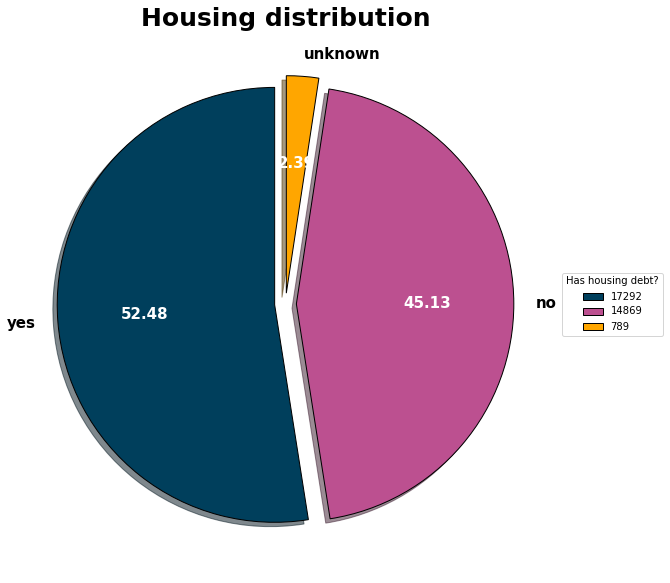

In [6]:
housing = [count['yes'], count['no'], count['unknown']]
explode = (0.05, 0.05, 0.05) 
colors = ( "#003f5c", "#bc5090", "#ffa600") 
wp = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, autotexts, texts = ax.pie(housing, explode = explode, labels = ['yes', 'no', 'unknown'], 
                           shadow = True, colors = colors, startangle = 90,
                           wedgeprops = wp, autopct='%.2f', 
                           textprops = dict(color ="white", weight='bold', size = 15))
  
ax.legend(wedges, housing, 
          title ="Has housing debt?", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 1.5, 1)) 
  
plt.setp(autotexts, color='black') 
ax.set_title("Housing distribution", fontsize=25, weight='bold') 
  
# show plot 
plt.show() 

#### Feature engineering

In [20]:
from sklearn.preprocessing import LabelEncoder


gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
genre_mappings

In [147]:
data['housing_labels'] = labels
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,housing_labels
0,31,admin.,single,university.degree,no,0,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0
1,39,blue-collar,single,basic.4y,unknown,1,unknown,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,70,retired,married,basic.4y,no,2,no,cellular,oct,mon,...,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,2
3,37,admin.,single,university.degree,no,0,no,cellular,may,wed,...,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,0
4,48,admin.,married,high.school,no,0,no,telephone,nov,tue,...,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,0
5,46,services,married,high.school,unknown,0,yes,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0
6,27,services,married,high.school,no,2,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,2
7,47,admin.,divorced,high.school,no,2,no,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,2
8,25,self-employed,single,university.degree,no,2,no,cellular,jun,fri,...,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,2
9,27,blue-collar,single,basic.9y,no,0,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0


#### Correlation evaluation

# FALTA CONTRA LOS VALORES QUE NO SON NUMERICOS

In [149]:
data.corr(method ='pearson') 

,age,housing,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,housing_labels
age,1.000000,0.004104,0.002847,0.002819,-0.035856,0.026519,0.000112,0.002811,0.127296,0.010991,-0.017799,0.004104
housing,0.004104,1.000000,-0.005861,-0.013823,-0.014476,0.023787,-0.064907,-0.083415,-0.029885,-0.063399,-0.051255,1.000000
duration,0.002847,-0.005861,1.000000,-0.069869,-0.048326,0.025536,-0.034460,0.000501,-0.009431,-0.038950,-0.051114,-0.005861
campaign,0.002819,-0.013823,-0.069869,1.000000,0.051082,-0.078954,0.152342,0.130869,-0.014587,0.136691,0.145251,-0.013823
pdays,-0.035856,-0.014476,-0.048326,0.051082,1.000000,-0.590188,0.274937,0.083261,-0.095368,0.299377,0.374621,-0.014476
previous,0.026519,0.023787,0.025536,-0.078954,-0.590188,1.000000,-0.421930,-0.204187,-0.050395,-0.456738,-0.502996,0.023787
emp.var.rate,0.000112,-0.064907,-0.034460,0.152342,0.274937,-0.421930,1.000000,0.774406,0.198292,0.972267,0.906427,-0.064907
cons.price.idx,0.002811,-0.083415,0.000501,0.130869,0.083261,-0.204187,0.774406,1.000000,0.060056,0.686713,0.519438,-0.083415
cons.conf.idx,0.127296,-0.029885,-0.009431,-0.014587,-0.095368,-0.050395,0.198292,0.060056,1.000000,0.280013,0.102781,-0.029885
euribor3m,0.010991,-0.063399,-0.038950,0.136691,0.299377,-0.456738,0.972267,0.686713,0.280013,1.000000,0.944882,-0.063399


The Pearson correlation index indicates that there is no correlation between Housing and the other columns

## Loan

In [ ]:
binaria, faltantes (?) - evaluar correlacion con otras columnas (trabajo, edad) 

In [27]:
count = data['loan'].value_counts()
print(count)

no         27196
yes         4965
unknown      789
Name: loan, dtype: int64


#### Missing data imputation

#### Encoding

In [39]:
clean_data = pd.concat([clean_data, pd.get_dummies(data['loan'], prefix='loan', drop_first = True)], axis=1)
clean_data.drop(columns='loan')
clean_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,loan_unknown,loan_yes
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,...,0,0,0,0,0,0,0,0,0,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,...,0,0,0,0,0,0,0,0,1,0
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,...,0,1,0,0,0,0,0,0,0,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,...,0,0,0,0,0,0,0,0,0,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,...,0,0,0,0,0,0,0,0,0,0


## Duration

This indicates the duration of the last call, in seconds. It is a numerical tyoe of data, with wide ranges.

#### Distribution

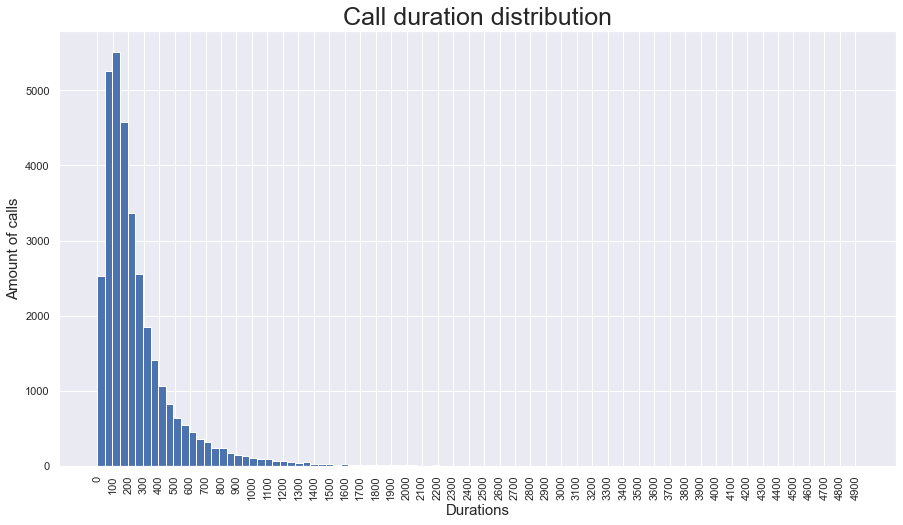

In [188]:
durations = data['duration']
range = np.arange(0, 5000, 100)
plt.figure(figsize=(15,8))
sns.set()
plt.hist(durations, bins=100)
plt.title(label="Call duration distribution", fontsize=25)
plt.xticks(range, rotation=90)
plt.xlabel('Durations', fontsize=15)
plt.ylabel('Amount of calls', fontsize=15)
plt.show()

It seems that we have outliers for the calls that last more than 1600 seconds.

#### Outliers analysis

In [193]:
data['duration'].describe()

count    32950.000000
mean       257.240728
std        257.171015
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

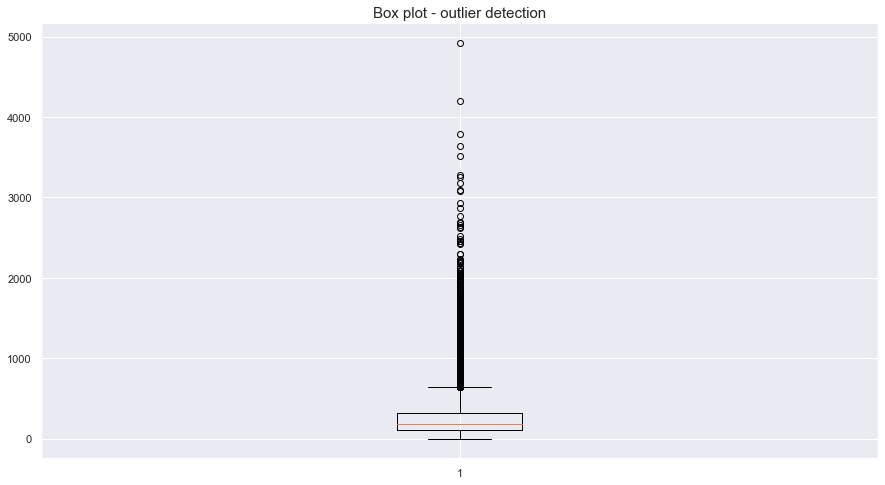

In [201]:
plt.figure(figsize=(15,8))
plt.title('Box plot - outlier detection', fontsize=15)
plt.boxplot(data['duration'])
plt.show()

Using the describe function and the box plot is clear that the higher numbers are likely to be outliers. The Pearson correlation doesn't indicate a relation between the call duration and the other measured values, we can assume that this outliers won't bias out data because they seem to be caused completely at random.

#### Feature engineering

The selected approach will be to do data binning for two main reasons:
- Using the individual call durations has no utility for the analysis
- We can treat the outliers and fit them into the top or lower bins
<br>
<br>
We will use equal width binning, it tries to divide up the underlying data into equal sized bins.
The qcut function from pandas will be used, it defines the bins using percentiles based on the distribution of the data, not the actual numeric edges of the bins.<br>
Reference: https://pbpython.com/pandas-qcut-cut.html, https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html

In [225]:
bins = pd.qcut(data['duration'], q=10)
bins.value_counts()

(88.0, 117.0]      3390
(-0.001, 59.0]     3366
(146.0, 180.0]     3358
(279.0, 367.0]     3304
(546.0, 4918.0]    3292
(367.0, 546.0]     3286
(221.0, 279.0]     3282
(180.0, 221.0]     3236
(59.0, 88.0]       3226
(117.0, 146.0]     3210
Name: duration, dtype: int64

## Campaign

In [ ]:
número de contactos realizados durante esta campaña y para este cliente -> solo evaluar si hay outliers

In [45]:
data['campaign'].describe()

count    32950.000000
mean         2.571411
std          2.784660
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

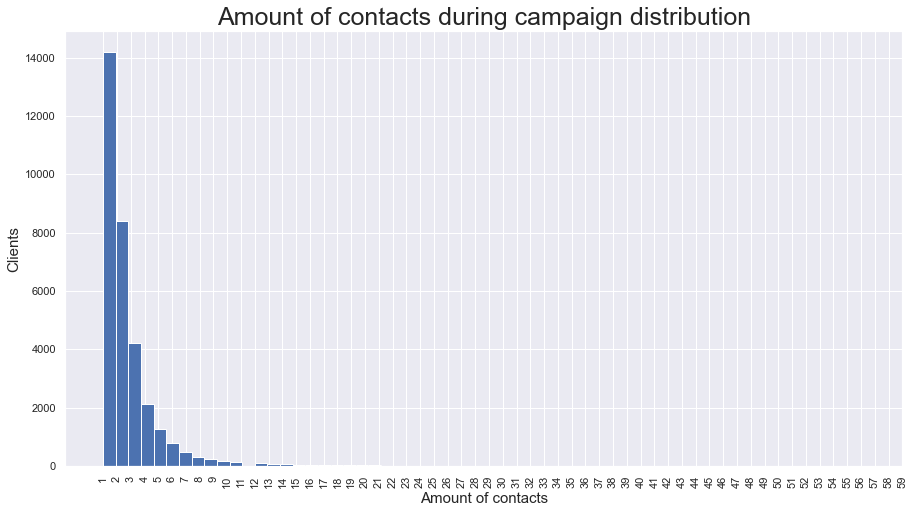

In [53]:
amount_campaign = data['campaign']
range = np.arange(1, 60, 1)
plt.figure(figsize=(15,8))
sns.set()
plt.hist(amount_campaign, bins=60)
plt.title(label="Amount of contacts during campaign distribution", fontsize=25)
plt.xticks(range, rotation=90)
plt.xlabel('Amount of contacts', fontsize=15)
plt.ylabel('Clients', fontsize=15)
plt.show()

Due to this distribution we are going to use a top-coding to normalize the data. 

#### Encoding

In [56]:
top_code = data['campaign'].quantile(0.75)

In [57]:
def campaign_top_coding(value):
    if(value > top_code + 1):
        return top_code + 1
    else:
        return value

In [62]:
clean_data['campaign'] = data['campaign'].apply(campaign_top_coding)
clean_data['campaign'].value_counts()

1.0    14200
2.0     8391
4.0     6126
3.0     4233
Name: campaign, dtype: int64

# Default

In [7]:
cant = data['default'].value_counts()
cant

no         26074
unknown     6875
yes            1
Name: default, dtype: int64

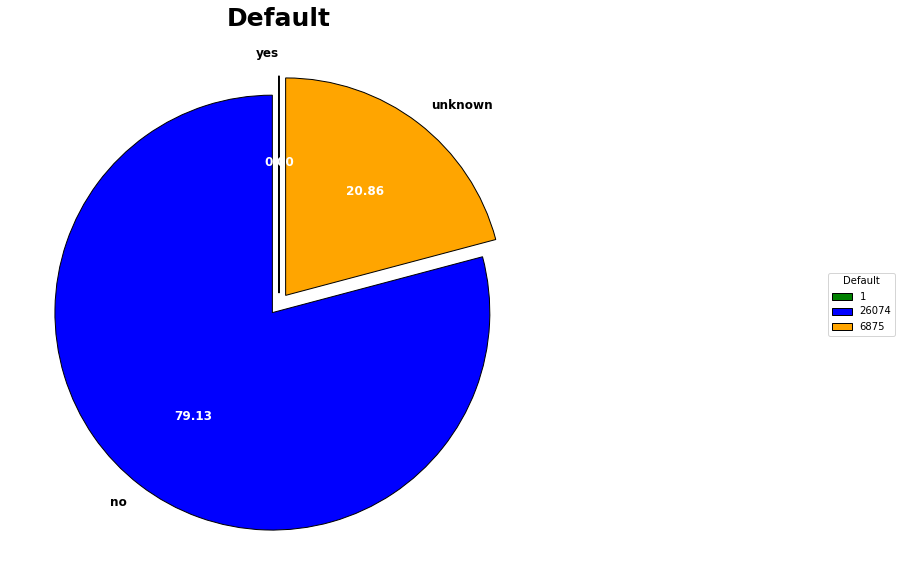

In [8]:
default = [cant['yes'], cant['no'], cant['unknown']]
c = ( "green", "blue", "orange") 
props = { 'linewidth' : 1, 'edgecolor' : "black" } 
  
fig, ax = plt.subplots(figsize =(15, 10)) 
wedges, autotexts, texts = ax.pie(default, explode = explode, labels = ['yes', 'no', 'unknown'], colors = c, startangle = 90,wedgeprops = props, autopct='%.2f', textprops = dict(color ="white", weight='bold', size = 12))
  
ax.legend(wedges, default, title ="Default", loc ="center left", bbox_to_anchor =(1.5, 0, 1.5, 1)) 
  
plt.setp(autotexts, color='black') 
ax.set_title("Default", fontsize=25, weight='bold') 
  
plt.show() 

In [9]:
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()
labels = gle.fit_transform(data['default'])
mappings = {index: label for index, label in enumerate(gle.classes_)}

In [10]:
data['default_labels'] = labels
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_labels
0,31,admin.,single,university.degree,no,no,no,cellular,jul,tue,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,wed,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,mon,...,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,wed,...,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,tue,...,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,0
5,46,services,married,high.school,unknown,no,yes,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,1
6,27,services,married,high.school,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,0
7,47,admin.,divorced,high.school,no,yes,no,telephone,jun,thu,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,0
8,25,self-employed,single,university.degree,no,yes,no,cellular,jun,fri,...,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,0
9,27,blue-collar,single,basic.9y,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0


In [11]:
data.corr(method ='pearson') 

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_labels
age,1.000000,0.002847,0.002819,-0.035856,0.026519,0.000112,0.002811,0.127296,0.010991,-0.017799,0.164402
duration,0.002847,1.000000,-0.069869,-0.048326,0.025536,-0.034460,0.000501,-0.009431,-0.038950,-0.051114,-0.010540
campaign,0.002819,-0.069869,1.000000,0.051082,-0.078954,0.152342,0.130869,-0.014587,0.136691,0.145251,0.034520
pdays,-0.035856,-0.048326,0.051082,1.000000,-0.590188,0.274937,0.083261,-0.095368,0.299377,0.374621,0.081258
previous,0.026519,0.025536,-0.078954,-0.590188,1.000000,-0.421930,-0.204187,-0.050395,-0.456738,-0.502996,-0.100619
emp.var.rate,0.000112,-0.034460,0.152342,0.274937,-0.421930,1.000000,0.774406,0.198292,0.972267,0.906427,0.199734
cons.price.idx,0.002811,0.000501,0.130869,0.083261,-0.204187,0.774406,1.000000,0.060056,0.686713,0.519438,0.166511
cons.conf.idx,0.127296,-0.009431,-0.014587,-0.095368,-0.050395,0.198292,0.060056,1.000000,0.280013,0.102781,0.025959
euribor3m,0.010991,-0.038950,0.136691,0.299377,-0.456738,0.972267,0.686713,0.280013,1.000000,0.944882,0.192075
nr.employed,-0.017799,-0.051114,0.145251,0.374621,-0.502996,0.906427,0.519438,0.102781,0.944882,1.000000,0.186816


# day_of_week

In [12]:
(data.day_of_week.unique())

array(['tue', 'wed', 'mon', 'fri', 'thu'], dtype=object)

In [13]:
def convertir(day_of_week):
    if day_of_week == 'mon':
        return 0
    elif day_of_week == 'tue':
        return 1
    elif day_of_week == 'wed':
        return 2
    elif day_of_week == 'thu':
        return 3
    elif day_of_week == 'fri':
        return 4
data["day_of_week"] = data["day_of_week"].apply(convertir)
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_labels
0,31,admin.,single,university.degree,no,no,no,cellular,jul,1,...,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no,0
1,39,blue-collar,single,basic.4y,unknown,unknown,unknown,telephone,may,2,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,1
2,70,retired,married,basic.4y,no,yes,no,cellular,oct,0,...,999,0,nonexistent,-3.4,92.431,-26.9,0.739,5017.5,yes,0
3,37,admin.,single,university.degree,no,no,no,cellular,may,2,...,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1,no,0
4,48,admin.,married,high.school,no,no,no,telephone,nov,1,...,999,2,failure,-1.1,94.767,-50.8,1.049,4963.6,no,0
5,46,services,married,high.school,unknown,no,yes,cellular,jul,0,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,1
6,27,services,married,high.school,no,yes,no,cellular,jul,4,...,999,0,nonexistent,1.4,93.918,-42.7,4.957,5228.1,no,0
7,47,admin.,divorced,high.school,no,yes,no,telephone,jun,3,...,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,yes,0
8,25,self-employed,single,university.degree,no,yes,no,cellular,jun,4,...,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,no,0
9,27,blue-collar,single,basic.9y,no,no,no,cellular,jul,0,...,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no,0
